In [28]:
class singleviewAnalyzer():

    def __init__(self,df,*id) :
        self.df = df
        self.id = id
        self.size = len(df)
        self.types = list(zip(df.columns,df.dtypes.to_list()))
        self.numeric_columns = list(df.select_dtypes(['int64','float64']).columns)
        self.text_columns = list(df.select_dtypes(['object']).columns)
        
    def EDA(self):

        import matplotlib.pyplot as plt
        import seaborn as sns

        ## explore ID Column
        ## Check number of ID Columns
        no_cols = len(self.id)
        if no_cols == 0 :
            print('\nThere is no ID columns specified')
        else : 
            print('\nID columns:' + ' ,'.join(map(str,self.id)))
        # Check duplication od ID Columns
        for col in self.id:
            no_rows = self.df[col].count()
            no_unique = self.df[col].nunique()
            if no_rows != no_unique:
                print('\nDuplication Warning:')
                print(' The total records of' + col + ' is '+ str(no_rows) + 
                        'but the total number of distint records is '+ str(no_unique))

        ##Explore text columns
        text_cols = list(set(self.text_columns) - set(self.id))
        if len(text_cols) != 0 :
            for i, col in enumerate(text_cols):
                print(col + ' has ' + str(self.df[col].nunique()) + 'distinct values')
        else :
            print('\nThere is no test column')
        
        ##Explore Numerical Column
        numeric_cols = list(set(self.numeric_columns)- set(self.id))
        if len(numeric_cols) != 0:

            print('\nNumerical Columns :'+' ,'.join(numeric_cols))
            for i,col in enumerate(numeric_cols):
                print('\nSummary Statistics of' + col)
                print('mean :' + str(round(self.df[col].mean(),2)))
                print('median :' + str(round(self.df[col].median(),2)))
                print('std.dev. :' + str(round(self.df[col].std(),3)))
                plt.figure(i)
                f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios":(.15,.85)})
                sns.distplot(self.df[col], color ='dimgray', hist_kws =dict(edgecolor="darkgray",linewidth =2,alpha = 0.2), ax =ax_hist)
                sns.boxplot(x=self.df[col], ax =ax_box)
            else :
                print('\nThere is no numeric column')

    def KMeans(self,k):
        from sklearn.preprocessing import StandardScaler
        from sklearn.cluster import KMeans
        from sklearn.decomposition import PCA
        import seaborn as sns
        import matplotlib.pyplot as plt
        import itertools

        numeric_cols = list(set(self.numeric_columns)- set(self.id))

        df_std = pd.DataFrame(StandardScaler().fit_transform(self.df[numeric_cols]))
        cluster = KMeans(n_clusters = k, random_state = 0)
        self.df['cluster'] = cluster.fit_predict(df_std)
        result_cols = ['cluster'] + self.numeric_columns
        print(self.df[result_cols].groupby('cluster').mean().add_prefix('avg_'))

        pca_cluster = PCA(n_components = 2)
        pca_results = pca_cluster.fit_transform(df_std)
        df_pca_results = pd.DataFrame(data = pca_results
            , columns =['principal component 1','principal component 2'])
        df_pca_results['cluster'] = self.df['cluster']

        plt.figure()
        plt.figure(figsize = (10,10))
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 14)
        plt.xlabel('Principal Component - 1', fontsize =20)
        plt.ylabel('Principal Component - 2', fontsize =20)
        plt.title('Principal Componant Analysis of Cluster Result',fontsize = 20)

        ## indicesToKeep = df_pca_result['cluster'].unique()
        palette = itertools.cycle(sns.color_palette())
        cluster_name = df['cluster'].unique()
        for cluster in cluster_name:
            plt.scatter(df_pca_results['principal component 1'][df['cluster']==cluster]
                        , df_pca_results['principal component 2'][df['cluster']==cluster],s =50, alpha =0.5
                        , color = next(palette))
        plt.legend(cluster_name, prop = {'size':15})















In [11]:
import pandas as pd
df = pd.DataFrame([['a',1,5,3],['b',2,4,7],['c',4,2,3],['a',6,4,2]], columns = ['name','value1','value2','value3'])


In [5]:
df['name'].unique()

array(['a', 'b', 'c'], dtype=object)


ID columns:value1
name has 3distinct values

Numerical Columns :value2 ,value3

Summary Statistics ofvalue2
mean :3.75
median :4.0
std.dev. :1.258

Summary Statistics ofvalue3
mean :3.75
median :3.0
std.dev. :2.217

There is no numeric column


C:\Users\USER\AppData\Local\Temp\ipykernel_27044\1048410863.py:52: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(self.df[col], color ='dimgray', hist_kws =dict(edgecolor="darkgray",linewidth =2,alpha = 0.2), ax =ax_hist)
C:\Users\USER\AppData\Local\Temp\ipykernel_27044\1048410863.py:52: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29

<Figure size 640x480 with 0 Axes>

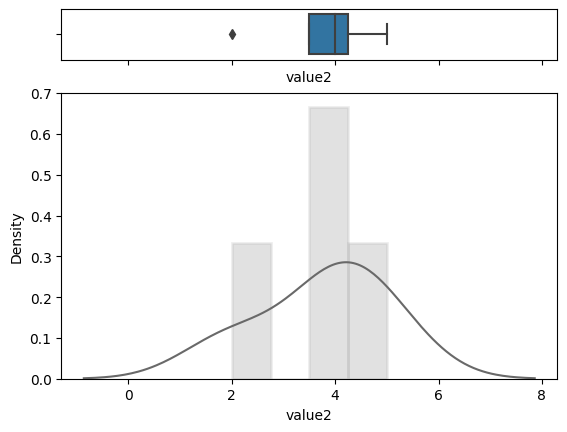

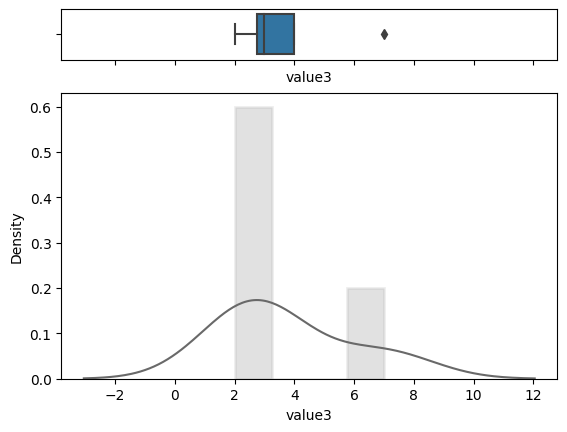

In [29]:
df_test = singleviewAnalyzer(df,'value1')
df_test.EDA()

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         avg_value1  avg_value2  avg_value3
cluster                                    
0               1.0         5.0         3.0
1               5.0         3.0         2.5
2               2.0         4.0         7.0


<Figure size 640x480 with 0 Axes>

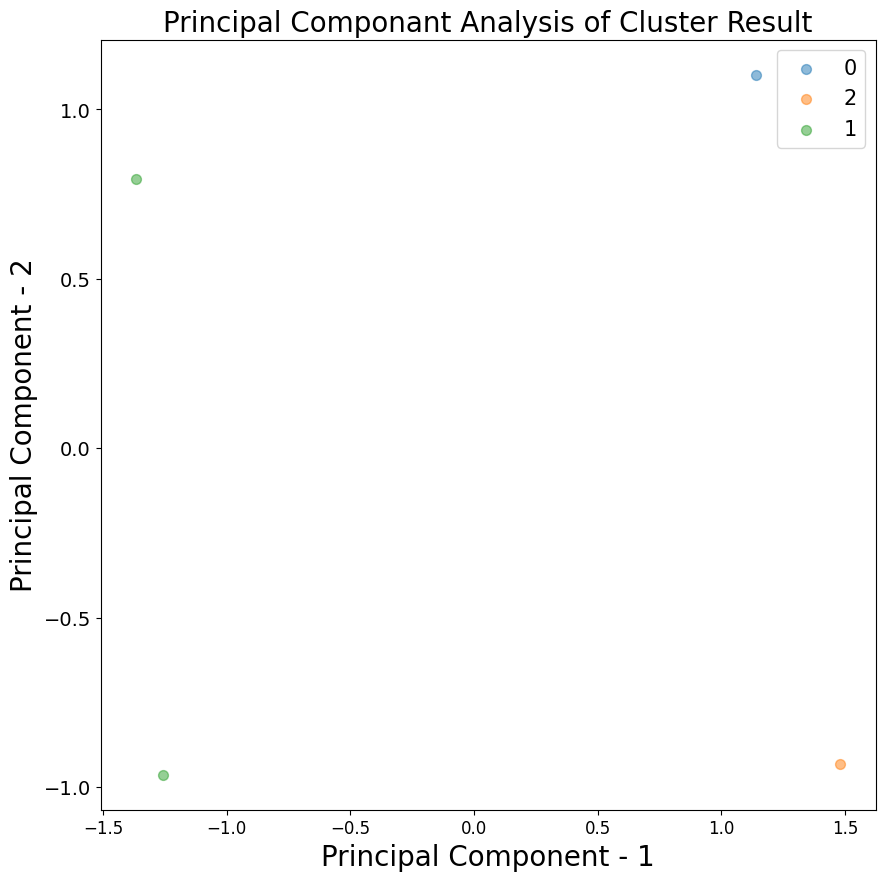

In [25]:
df_test =singleviewAnalyzer(df,'name')
df_test.KMeans(3)